# **CNN Model Training**

# importing libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
# Load the MNIST dataset. It's pre-split into training and testing sets.
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Reshape the images to add a channel dimension.
# A CNN expects a 4D tensor: (num_images, height, width, channels).
# For grayscale images like MNIST, the channel is 1.
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

# Normalize the pixel values from 0-255 to a range of 0-1.
# This improves model training by preventing large input values.
train_images /= 255.0
test_images /= 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Build the CNN Model

In [3]:
def create_cnn_model():
    # Use the Sequential API to build a model layer by layer.
    model = Sequential()

    # The first convolutional layer.
    # It applies 32 filters of size 3x3 to the input images.
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # A pooling layer to reduce the spatial dimensions of the feature maps.
    # This helps reduce computation and makes the model more robust.
    model.add(MaxPooling2D((2, 2)))

    # A second convolutional layer with 64 filters.
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the 3D output of the convolutional layers into a 1D vector.
    # This prepares the data for the dense (fully connected) layers.
    model.add(Flatten())

    # A fully connected layer with 64 neurons.
    model.add(Dense(64, activation='relu'))

    # A dropout layer to randomly drop neurons during training, preventing overfitting.
    model.add(Dropout(0.5))

    # The final output layer. It has 10 neurons, one for each digit (0-9).
    # The 'softmax' activation gives a probability distribution over the 10 classes.
    model.add(Dense(10, activation='softmax'))

    return model

#  Compile and Train the Model

In [4]:
# Create an instance of the model.
cnn_model = create_cnn_model()

# Compile the model with an optimizer, a loss function, and metrics to monitor.
# Adam is a good all-purpose optimizer.
# 'sparse_categorical_crossentropy' is the standard loss for integer-based classification labels.
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model on the training data.
# 'epochs' is the number of times the model will see the entire dataset.
# 'validation_data' provides a separate dataset to evaluate performance during training.
history = cnn_model.fit(train_images, train_labels, epochs=5,
                        validation_data=(test_images, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.8162 - loss: 0.5680 - val_accuracy: 0.9817 - val_loss: 0.0558
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 25ms/step - accuracy: 0.9624 - loss: 0.1266 - val_accuracy: 0.9878 - val_loss: 0.0365
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9737 - loss: 0.0909 - val_accuracy: 0.9914 - val_loss: 0.0291
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.9768 - loss: 0.0773 - val_accuracy: 0.9886 - val_loss: 0.0363
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9789 - loss: 0.0664 - val_accuracy: 0.9893 - val_loss: 0.0347


# Evaluate and Visualize Results

313/313 - 2s - 7ms/step - accuracy: 0.9893 - loss: 0.0347

Test accuracy: 0.9893


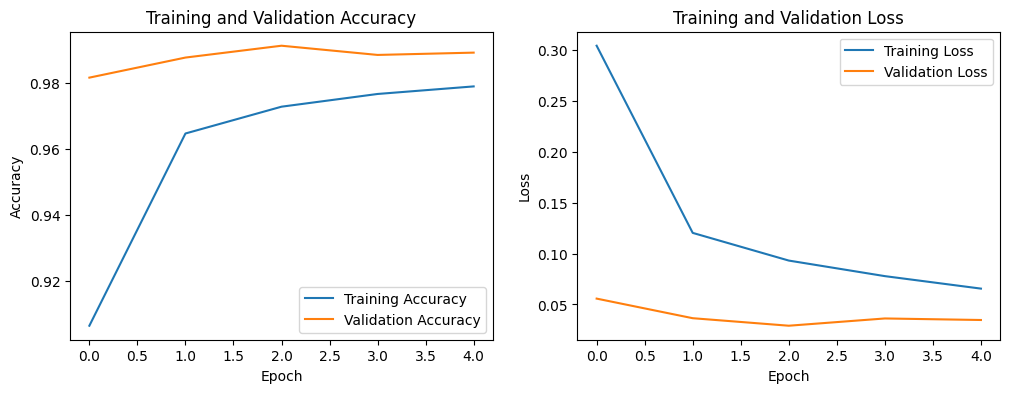

In [5]:
# Evaluate the model's performance on the unseen test set.
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Plot the training and validation accuracy and loss.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()